# Regressão Linear 1D
- Busca encontrar a relação entre uma variável independente (x) e uma variável dependente (y) por meio de uma linha reta

$$y = ax + b$$

- **x**: Valor que você pode controlar ou medir (Ex: Metragem de uma casa -> Influencia no preço da casa)
- **y**: Valor que depende de x e é o que queremos prever (Ex: Preço da casa -> Depende da metragem)
- **a**: Coeficiente angular (Indica o quanto y muda quando x muda)
- **b**: Intercepto (Valor de y quando x=O)

Nosso objetivo é encontrar os valores ideais de a (w1) e b (w0) que minimizem os erros de previsão

# 1. Importando bibliotecas

In [1]:
import warnings 
warnings.filterwarnings("ignore")

- Essa linha desativa os avisos para evitar mensagens desnecessárias ao rodar o código

In [2]:
import numpy as np
import matplotlib.pyplot as plt

- **numpy** é usado para cálculos matemáticos, como somas e multiplicações
- **matplotlib.pyplot** é usado para criar gráficos

# 2. Criando os dados

In [3]:
X = [0,0.12,0.25,0.27,0.38,0.42,0.44,0.55,0.92,1.0] #features
Y = [0,0.15,0.54,0.51,0.34,0.1,0.19,0.53,1.0,0.58] #target

- **X** Representa os valores independentes
- **Y** Representa os valores dependentes

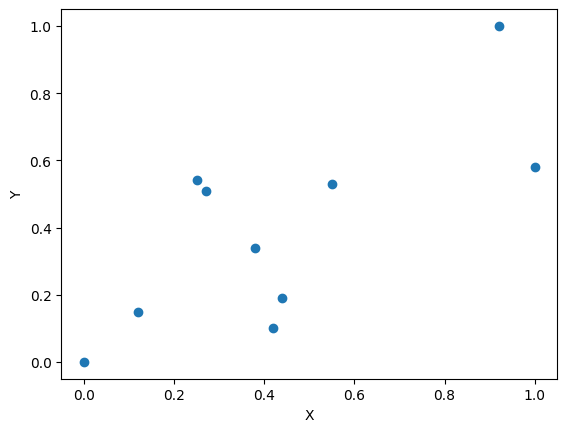

In [5]:
plt.scatter(X,Y)
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

- **plt.scatter(X,Y)** cria um gráfico de disperção (pontos individuais)
- Isso ajuda a visualizar de há uma relação entre **x** e **y**

# 3. Inicializando os parâmetros

In [11]:
w1 = 0.1 #coeficiente angular (inclinação)
w0 = 0.7 #intercepto (onde a reta cruza o eixo y)
alpha = 0.01 #taxa de aprendizado
iteracoes = 1000 #número de iterações
costs = [] #lista para armazenar os valores da função custo

- Chutamos números para os parâmetros iniciais **wo** e **w1**

## Gradiente Descendente 
O objetivo é encontrar os valores de w1 e w0 na equação da regressão linear. 
O modelo precisa minimizar um erro, geralmente medido pelo **Erro Quadrático Médio**
$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (Y_{\text{chapéu i}} - Y_{\text{i}})^2
$$

- **alpha** (taxa de aprendizado) controla o tamanho do ajuste do Gradiente Descendente
- **costs** será usada para registrar o erro a cada iteração

# 4. Primeira visualização da reta

Text(0.5, 0, 'X')

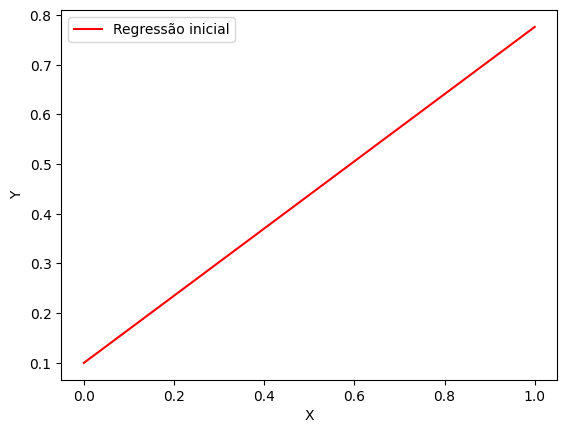

In [21]:
fig, ax = plt.subplots()
ax.plot(X, np.multiply(w1, X) + w0, 'r-', label='Regressão inicial')
ax.legend()
plt.ylabel('Y')
plt.xlabel('X')      

# 5. Treinamento com gradiente descendente

Gradiente Descendente é um algoritmo que ajusta os coeficientes w1 e w0 para minimizar o erro da previsão

## Fórmula da função custo
A função custo mede o erro da previsão. Usamos o **Erro Quadrático Médio**
$$
Custo =\sum_{i=1}^{n} (Y_{\text{chapéu i}} - Y_{\text{i}})^2
$$

Onde: $$Y_{\text{chápeu i}} = w_1 X + w_0$$

## Atualizando os coeficientes 
Os coeficientes são atualizados usando as derivadas parciais 

$$w_1 = w_1 - \alpha \sum \left( (Y_{\text{pred}} - Y) X \right)$$

$$w_0 = w_0 - \alpha \sum \left( (Y_{\text{pred}} - Y) \right)$$

Vamos ver como isso acontece no código:

Custo em 999 iterações = 0.3792148533270863
w1 = 0.6763298820890978 w0 = 0.09980829212408686


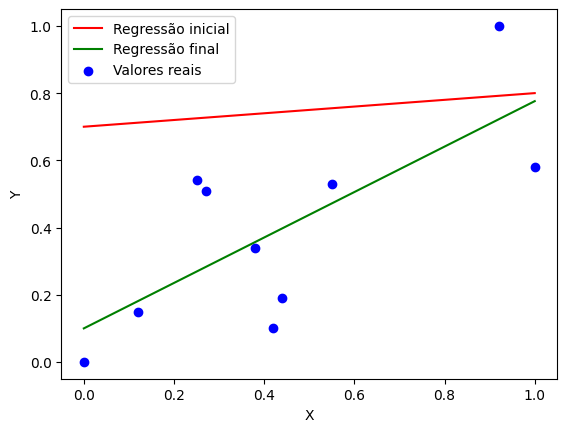

In [24]:
w1 = 0.1 #coeficiente angular (inclinação)
w0 = 0.7 #intercepto (onde a reta cruza o eixo y)
alpha = 0.01 #taxa de aprendizado
iteracoes = 1000 #número de iterações
costs = [] #lista para armazenar os valores da função custo

fig, ax = plt.subplots()
ax.plot(X, np.multiply(w1, X) + w0, 'r-', label='Regressão inicial')
ax.legend()
plt.ylabel('Y')
plt.xlabel('X')   

for i in range(iteracoes):
    Y_pred = np.multiply(w1, X) + w0  # Previsão de Y
    Loss_error = (Y_pred - Y)**2  # Erro quadrático
    cost = np.sum(Loss_error)  # Soma dos erros quadráticos
    
    # Gradientes
    dw0 = np.sum((Y_pred - Y))  # Derivada de w0
    dw1 = np.dot((Y_pred - Y), X)  # Derivada de w1
    
    costs.append(cost)  # Armazena o custo para análise
    
    # Atualização dos coeficientes
    w1 = w1 - alpha * dw1
    w0 = w0 - alpha * dw0

    # Exibe os resultados na última iteração
    if i == (iteracoes - 1):
        print("Custo em", i, "iterações =", cost)
        print("w1 =", w1, "w0 =", w0)
        ax.plot(X, np.multiply(w1, X) + w0, 'g-', label='Regressão final')
        ax.scatter(X, Y, color='blue', label='Valores reais')
        ax.legend(loc='best')
        plt.show()

O código ajusta **w1** e **w0** a cada iteração para minimizar o erro

No final, plota a reta final ajustada

# 6. Analisando a convergência

w1 =  0.6763298820890978 & w0 =  0.09980829212408686


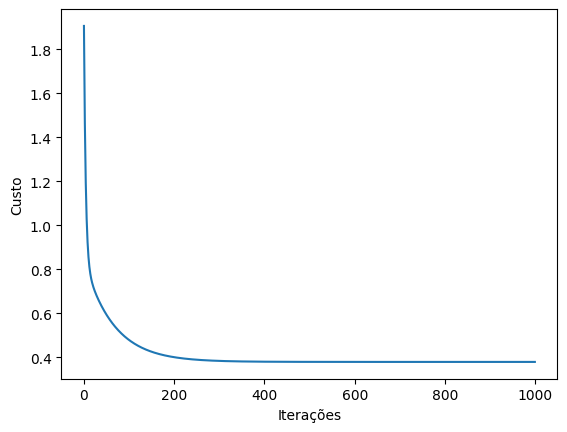

In [25]:
print("w1 = ", w1, "& w0 = ", w0)
plt.plot(costs)
plt.ylabel('Custo')
plt.xlabel('Iterações')
plt.show()

O gráfico mostra a redução do erro ao longo do tempo

Um bom modelo terá uma curva de custo decrescente

# 7. Fazendo previsões (API)

In [27]:
nova_entrada_X = 1.2
y_estimado_fs = nova_entrada_X * w1 + w0
print ('O valor estimado para a entrada: ', nova_entrada_X, 'é ', y_estimado_fs)

O valor estimado para a entrada:  1.2 é  0.9114041506310042


Faz uma previsão para um novo valor de x = 1.2 usando o modelo treinado

# 8. Comparando com o Sckikit-Learn

Agora, treinamos um modelo equivalente usando a biblioteca scikit-Learn:

In [28]:
from sklearn.linear_model import LinearRegression

- **LinearRegression** é um modelo pronto de regressão linear

In [30]:
X_sk = np.array(X)
Y_sk = np.array(Y)
lm = LinearRegression()
lm.fit(X_sk.reshape(-1,1), Y_sk)

LinearRegression()

- **lm.fit()** treina o modelo
- O formato **reshape(-1,1)** é necessário porque o sklearn exige que X seja uma matriz coluna

In [31]:
print('wi, i>0: \n', lm.coef_)
print('wo: \n', lm.intercept_)

wi, i>0: 
 [0.67665744]
wo: 
 0.09965401531194013


# 9. Fazendo previsões com o Sklearn

Text(0, 0.5, 'Y estimado')

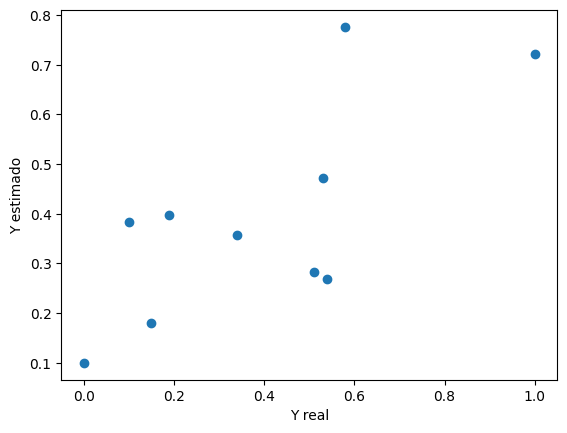

In [32]:
predictions = lm.predict(X_sk.reshape(-1,1))
plt.scatter(Y_sk, predictions)
plt.xlabel('Y real')
plt.ylabel('Y estimado')

- Compara as previsões estimadas com os valores reais

In [33]:
nova_entrada_X = 1.2
y_estimado_sk = nova_entrada_X * lm.coef_ + lm.intercept_
print(f'O valor estimado para a entrada: {nova_entrada_X} é {y_estimado_sk[0]}')

O valor estimado para a entrada: 1.2 é 0.9116429385893468


- Faz uma previsão com **X = 1.2** usando o modelo do SkLearn